In [137]:
import networkx as nx

import matplotlib.pyplot as plt
import random
import json
import community as community_louvain

import numpy as np

# 设置随机种子
#random.seed(42)
#np.random.seed(42)
#from networkx.algorithms.community import girvan_newman

In [138]:
path = '/Users/qing/Desktop/24s1/comp8880/project/code/data/email/email-Eu-core-department-labels.txt'
G = read_directed_graph(path,3)
G.remove_edges_from(nx.selfloop_edges(G))

In [2]:
with open('saved/network_metrics_slash.json', 'r') as f:
    loaded_data = json.load(f)

# 访问加载的数据
sorted_centrality = loaded_data["Centrality"]
sorted_betweenness = loaded_data["Betweenness"]
sorted_closeness = loaded_data["Closeness"]
sorted_pagerank =  loaded_data["PageRank"]
sorted_leaderRank =  loaded_data["LeaderRank"]
sorted_hIndex =  loaded_data["HIndex"]
sorted_kShell=  loaded_data["KShell"]
# 更多的访问可以根据需要添加


In [14]:

print(sorted_hIndex[:3])
#print(loaded_betweenness)


[('121', 98), ('82', 97), ('107', 97)]


In [106]:
def read_ground_truth_labels(file_path):
    """Read ground truth labels from a file."""
    labels = {}
    with open(file_path, 'r') as file:
        for line in file:
            node, label = line.strip().split()
            labels[int(node)] = int(label)
    return labels

# Example usage:
# labels = read_ground_truth_labels('/path/to/email-Eu-core-department-labels.txt')


In [109]:
# 使用Louvain算法进行社区检测
def detect_communities(G):
    partition = community_louvain.best_partition(G)
    return partition

def detect_communities_with_ground_truth(G, ground_truth_labels):
    """Use ground truth labels as community assignments."""
    partition = {str(node): label for node, label in ground_truth_labels.items() if str(node) in G.nodes()}
    return partition


# 统计前top节点在各社区中的分布
def count_top_nodes_in_communities(G, sorted_maps, top, partition):
    community_counts = {name: {} for name in sorted_maps.keys()}
    
    for name, sorted_map in sorted_maps.items():
        top_nodes = [node for node, _ in sorted_map[:top]]  # 提取前top个节点
        for node in top_nodes:
            community = partition[node]
            if community not in community_counts[name]:
                community_counts[name][community] = 0
            community_counts[name][community] += 1
    
    return community_counts

# 可视化前top节点在各社区中的分布
def plot_top_nodes_distribution(community_counts, top):
    plt.figure(figsize=(15, 10))

    for i, (name, counts) in enumerate(community_counts.items()):
        communities = list(counts.keys())
        counts = list(counts.values())
        
        plt.subplot(3, 3, i + 1)
        plt.bar(communities, counts)
        plt.title(f'Distribution of Top {top} Nodes in Communities\n({name})')
        plt.xlabel('Community')
        plt.ylabel('Number of Top Nodes')

    plt.tight_layout()
    plt.show()

# 统计每个社区的节点数量并排序
def count_and_sort_communities(partition):
    community_counts = {}
    for node, community in partition.items():
        if community not in community_counts:
            community_counts[community] = 0
        community_counts[community] += 1
    
    # 按照节点数量排序社区
    sorted_community_counts = sorted(community_counts.items(), key=lambda x: x[1], reverse=True)
    return sorted_community_counts

In [115]:
# 示例：检测社区并统计前top节点的分布
sorted_maps = {
    "Centrality": sorted_centrality,
    "Betweenness": sorted_betweenness,
    "Closeness": sorted_closeness,
    "PageRank": sorted_pagerank,
    "LeaderRank": sorted_leaderRank,
    "H-index": sorted_hIndex,
    "K-Shell": sorted_kShell
}

ground_truth_labels = read_ground_truth_labels('/Users/qing/Desktop/24s1/comp8880/project/code/data/email/email-Eu-core-department-labels.txt')
partition = detect_communities_with_ground_truth(G, ground_truth_labels)



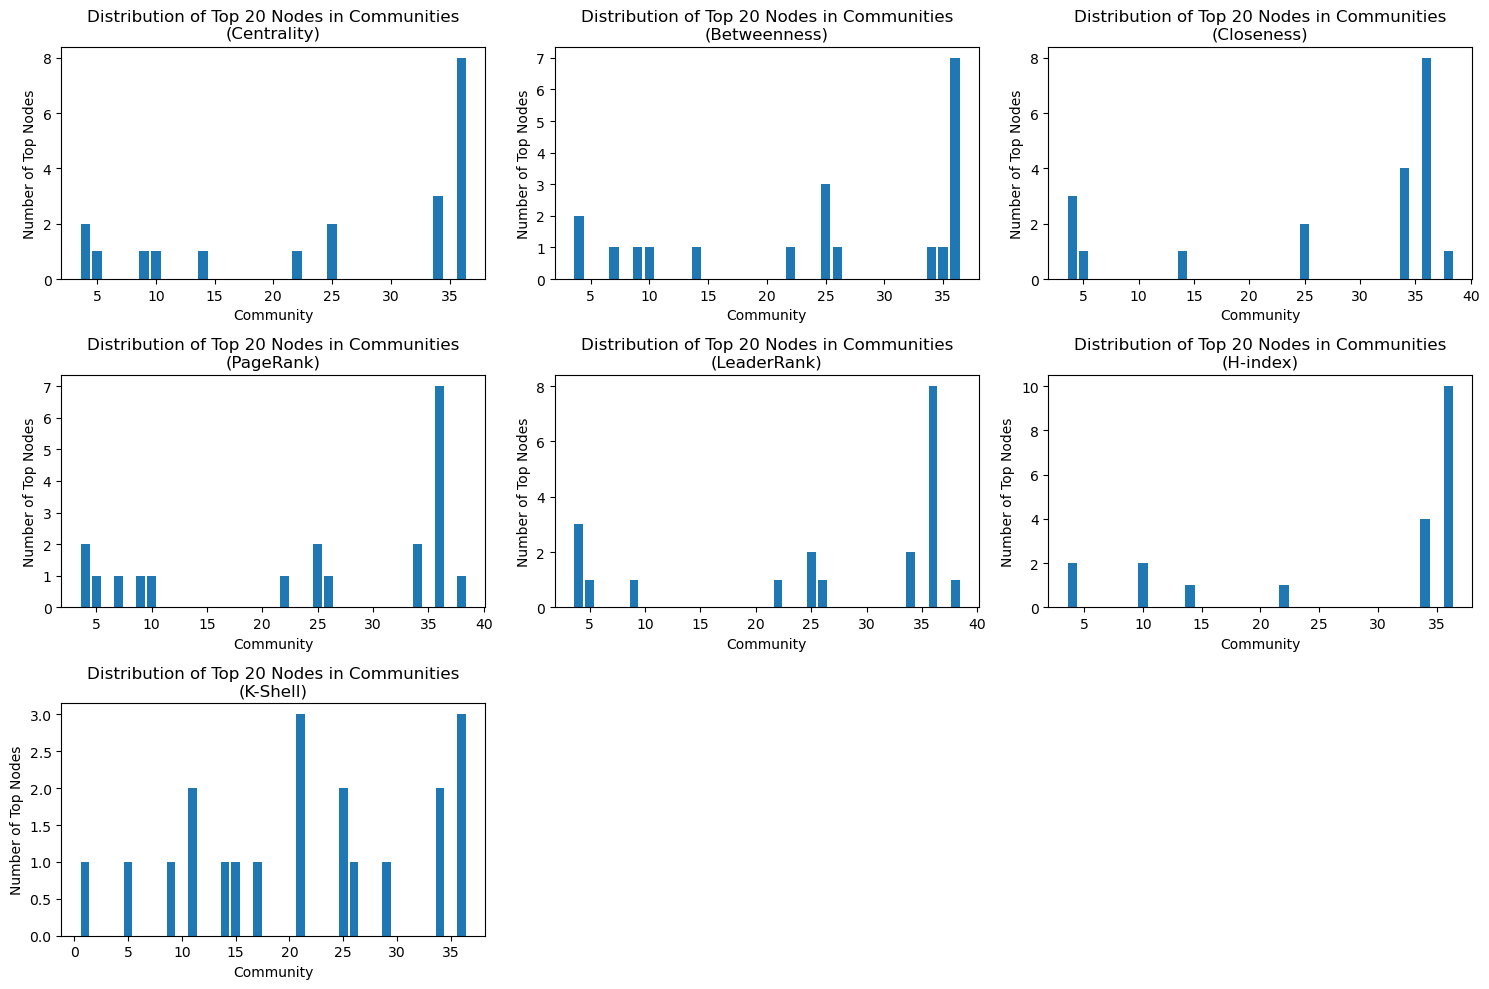

In [123]:
top = 20
community_counts = count_top_nodes_in_communities(G, sorted_maps, top, partition)
plot_top_nodes_distribution(community_counts, top)


In [113]:
sorted_community_counts = count_and_sort_communities(partition)

for community, count in sorted_community_counts:
    print(f"Community {community}: {count} nodes")


Community 4: 109 nodes
Community 14: 92 nodes
Community 1: 65 nodes
Community 21: 61 nodes
Community 15: 55 nodes
Community 7: 51 nodes
Community 0: 49 nodes
Community 10: 39 nodes
Community 17: 35 nodes
Community 9: 32 nodes
Community 11: 29 nodes
Community 19: 29 nodes
Community 6: 28 nodes
Community 23: 27 nodes
Community 13: 26 nodes
Community 22: 25 nodes
Community 16: 25 nodes
Community 36: 22 nodes
Community 8: 19 nodes
Community 5: 18 nodes
Community 37: 15 nodes
Community 20: 14 nodes
Community 34: 13 nodes
Community 38: 13 nodes
Community 35: 13 nodes
Community 3: 12 nodes
Community 27: 10 nodes
Community 2: 10 nodes
Community 26: 9 nodes
Community 32: 9 nodes
Community 28: 8 nodes
Community 31: 8 nodes
Community 25: 6 nodes
Community 24: 6 nodes
Community 29: 5 nodes
Community 40: 4 nodes
Community 30: 4 nodes
Community 39: 3 nodes
Community 12: 3 nodes
Community 41: 2 nodes
Community 18: 1 nodes
Community 33: 1 nodes


In [ ]:
partition

{0: 1,
 1: 1,
 2: 21,
 3: 21,
 4: 21,
 5: 25,
 6: 25,
 7: 14,
 8: 14,
 9: 14,
 10: 9,
 11: 14,
 12: 14,
 13: 26,
 14: 4,
 15: 17,
 16: 34,
 17: 1,
 18: 1,
 19: 14,
 20: 9,
 21: 9,
 22: 9,
 23: 11,
 24: 11,
 25: 11,
 26: 11,
 27: 11,
 28: 11,
 29: 11,
 30: 11,
 31: 11,
 32: 11,
 33: 11,
 34: 11,
 35: 11,
 36: 11,
 37: 11,
 38: 11,
 39: 11,
 40: 11,
 41: 5,
 42: 34,
 43: 14,
 44: 14,
 45: 17,
 46: 17,
 47: 10,
 48: 10,
 49: 36,
 50: 37,
 51: 5,
 52: 7,
 53: 4,
 54: 22,
 55: 22,
 56: 21,
 57: 21,
 58: 21,
 59: 21,
 60: 7,
 61: 7,
 62: 36,
 63: 21,
 64: 25,
 65: 4,
 66: 8,
 67: 15,
 68: 15,
 69: 15,
 70: 37,
 71: 37,
 72: 9,
 73: 1,
 74: 1,
 75: 10,
 76: 10,
 77: 3,
 78: 3,
 79: 3,
 80: 29,
 81: 15,
 82: 36,
 83: 36,
 84: 37,
 85: 1,
 86: 36,
 87: 34,
 88: 20,
 89: 20,
 90: 8,
 91: 15,
 92: 9,
 93: 4,
 94: 5,
 95: 4,
 96: 20,
 97: 16,
 98: 16,
 99: 16,
 100: 16,
 101: 16,
 102: 38,
 103: 7,
 104: 7,
 105: 34,
 106: 38,
 107: 36,
 108: 8,
 109: 27,
 110: 8,
 111: 8,
 112: 8,
 113: 10,
 114:

24.80497512437811


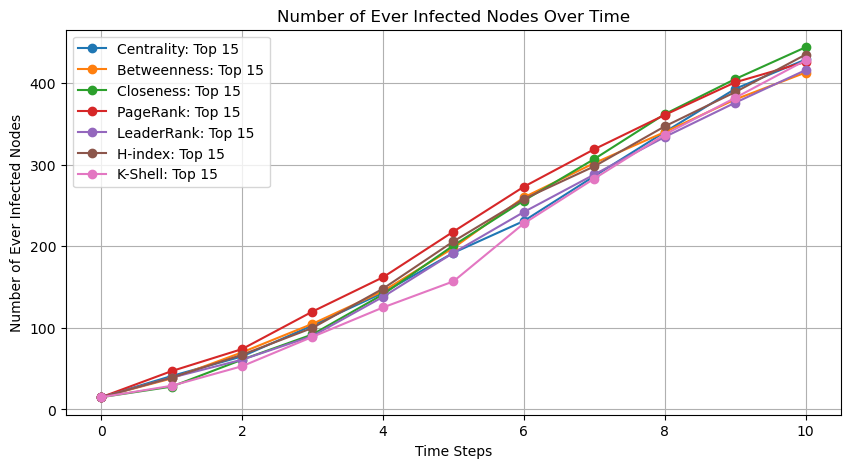

In [ ]:

def plot_sir_simulation(G, sorted_maps, top, infection_prob=0.05, steps=100):
    plt.figure(figsize=(10, 5))

    # Calculate average in-degree
    avg_in_degree = sum(dict(G.in_degree()).values()) / G.number_of_nodes()
    print(avg_in_degree)
    recovery_prob = 1 / avg_in_degree

    # Iterate through all sorted maps
    for name, sorted_map in sorted_maps.items():
        top_nodes = [node for node, _ in sorted_map[:top]]  # Extract top nodes
        history, ever_infected, infected_counts = SIR_simulation(G, top_nodes, infection_prob, recovery_prob, steps)
        plt.plot(infected_counts, marker='o', linestyle='-', label=f'{name}: Top {top}')

    plt.title('Number of Ever Infected Nodes Over Time')
    plt.xlabel('Time Steps')
    plt.ylabel('Number of Ever Infected Nodes')
    plt.grid(True)
    plt.legend()
    plt.show()

def SIR_simulation(G, initial_infected, infection_prob=0.5, recovery_prob=0.05, steps=100):
    # Initialize the status of each node
    status = {node: 'S' for node in G.nodes()}
    for node in initial_infected:
        status[node] = 'I'

    history = []
    ever_infected = set(initial_infected)
    infected_counts = [len(ever_infected)]  # Initial number of infected nodes

    # Simulation process
    for _ in range(steps):
        new_status = status.copy()
        for node in G.nodes():
            if status[node] == 'I':
                for neighbor in G.neighbors(node):
                    if status[neighbor] == 'S' and random.random() < infection_prob:
                        new_status[neighbor] = 'I'
                        ever_infected.add(neighbor)
                if random.random() < recovery_prob:
                    new_status[node] = 'R'
        history.append(new_status)
        status = new_status
        infected_counts.append(len(ever_infected))  # Record the total number of infected nodes

        if not any(s == 'I' for s in status.values()):
            break

    return history, ever_infected, infected_counts

# Example usage:
# G = nx.DiGraph()  # Your graph here
# sorted_maps = {'LeaderRank': leader_rank_sorted, 'PageRank': page_rank_sorted}  # Your sorted maps here
# plot_sir_simulation(G, sorted_maps, top=20)
sorted_maps = {
    "Centrality": sorted_centrality,
    "Betweenness": sorted_betweenness,
    "Closeness": sorted_closeness,
    "PageRank": sorted_pagerank,
    "LeaderRank": sorted_leaderRank,
    "H-index": sorted_hIndex,
    "K-Shell": sorted_kShell
}



plot_sir_simulation(G, sorted_maps,top=15, infection_prob=0.01,steps=10)

In [139]:
def read_directed_graph(file_path, skip_lines):
    G = nx.DiGraph()  # Initialize an empty directed graph
    with open(file_path, 'r') as file:
        for _ in range(skip_lines):
            next(file)  # Skip the initial descriptive lines
        for line in file:
            parts = line.strip().split()
            if len(parts) == 2:  # Only consider lines with exactly two node identifiers
                u, v = parts
                G.add_edge(u, v)
    
    return G


def leader_rank(G2):

    # Add the ground node connected to all other nodes
    ground_node = 'ground'
    G = G2.copy()
    G.add_node(ground_node)
    for node in set(G.nodes()) - {ground_node}:
        G.add_edge(ground_node, node)

    # Initialize scores to 1 for all nodes except the ground node
    scores = {node: 1 for node in G.nodes()}

    # Power iteration: iterate until convergence
    iterations = 100  # Set a suitable number of iterations
    damping = 0.85    # Usually a damping factor is not used, but can be if desired
    for _ in range(iterations):
        new_scores = {node: 0 for node in G.nodes()}
        for node in G.nodes():
            for neighbor in G.neighbors(node):
                new_scores[neighbor] += scores[node] / len(list(G.neighbors(node)))
        new_scores[ground_node] = 1 - damping + damping * new_scores[ground_node]
        scores = new_scores

    # Remove the ground node score and normalize the scores
    del scores[ground_node]
    total_score = sum(scores.values())
    scores = {node: score / total_score for node, score in scores.items()}
    
    return scores


def calculate_h_index(G):
    h_index = {}
    for node in G.nodes():
        degrees = [G.degree(neighbor) for neighbor in G.neighbors(node)]
        degrees.sort(reverse=True)
        h = 0
        for i, degree in enumerate(degrees):
            if degree >= i + 1:
                h = i + 1
            else:
                break
        h_index[node] = h
    return h_index


In [ ]:
# Initialize an empty directed graph
# Load the .mtx file
wiki_path = '/Users/qing/Desktop/24s1/comp8880/project/code/data/wiki-Vote.txt'
G_wiki = read_directed_graph(wiki_path,4)
# Calculate number of nodes and edges in the graph
num_nodes = G_wiki.number_of_nodes()
num_edges = G_wiki.number_of_edges()

num_nodes, num_edges

centrality = nx.degree_centrality(G_wiki)
betweenness_manual = nx.betweenness_centrality(G_wiki)
closeness_manual = nx.closeness_centrality(G_wiki)
pagerank = nx.pagerank(G_wiki, alpha=0.85, personalization=None)
leaderRank = leader_rank(G_wiki)
hIndex = calculate_h_index(G_wiki)
kShell = nx.core_number(G_wiki)

sorted_centrality = sorted(centrality.items(), key=lambda item: item[1], reverse=True)
sorted_betweenness = sorted(betweenness_manual.items(), key=lambda item: item[1], reverse=True)
sorted_closeness = sorted(closeness_manual.items(), key=lambda item: item[1], reverse=True)
sorted_pagerank =  sorted(pagerank.items(), key=lambda item: item[1], reverse=True)
sorted_leaderRank =  sorted(leaderRank.items(), key=lambda item: item[1], reverse=True)
sorted_hIndex =  sorted(hIndex.items(), key=lambda item: item[1], reverse=True)
sorted_kShell=  sorted(kShell.items(), key=lambda item: item[1], reverse=True)


print(sorted_centrality[:3])
print(sorted_betweenness[:3])
print(sorted_closeness[:3])
print(sorted_pagerank[:3])
print(sorted_leaderRank[:3])
print(sorted_hIndex[:3])
print(sorted_kShell[:3])



# 假设 sorted_centrality, sorted_betweenness 等都是已经计算好并排序的元组列表
data_to_save = {
    "Centrality": sorted_centrality,
    "Betweenness": sorted_betweenness,
    "Closeness": sorted_closeness,
    "PageRank": sorted_pagerank,
    "LeaderRank": sorted_leaderRank,
    "HIndex": sorted_hIndex,
    "KShell": sorted_kShell
}

with open('saved/network_metrics_wiki.json', 'w') as f:
    json.dump(data_to_save, f, indent=4)
